In [ ]:
# Import required libraries
import random
import numpy as np
from scipy.optimize import minimize

# Constants
EV = 'EV1'  # EV identifier
CSs = ['CS1', 'CS2', 'CS3', 'CS4', 'CS5', 'CS6', 'CS7', 'CS8', 'CS9', 'CS10']  # List of Charging Stations
num_CSs = len(CSs)  # Number of Charging Stations

# Assumptions
WT = Ww = WC = 0.1  # Weight for converting time cost to monetary cost ($/minute)
Vs = 50  # Speed of EV (km/h)
min_wait_time = 10  # Minimum waiting time at CS (seconds)
max_wait_time = 20  # Maximum waiting time at CS (seconds)

# Generate random data for CSs
alpha_values = np.random.uniform(5, 15, num_CSs)  # Charging power at each CS (randomly generated between 5 and 15 kW)
Cm_values = np.random.uniform(0.3, 0.7, num_CSs)  # Electricity charging cost per unit time at each CS (randomly generated between 0.3 and 0.7 $/kWh)
Cp_values = np.random.uniform(0.1, 0.3, num_CSs)  # Parking cost per unit time at each CS (randomly generated between 0.1 and 0.3 $/minute)
dm_values = np.random.uniform(5, 20, num_CSs)  # Distance of each CS from EV (randomly generated between 5 and 20 km)

# Function to calculate total cost
def calculate_total_cost(SoCdes, SoCcur, alpha, Cm, Cp, dm, Twait):
    # Monetary cost
    Tch = (SoCdes - SoCcur) / alpha
    Cmon = Tch * (Cm + Cp)

    # Traveling time cost
    Ctra = WT * dm / Vs

    # Charging time cost
    Ttot = (SoCdes - SoCcur) / alpha
    Cchar = WC * Ttot

    # Waiting time cost
    Cwait = Ww * Twait / 60  # Convert waiting time to minutes

    # Overall cost
    C = Cmon + Ctra + Cchar + Cwait

    return C

# Optimization function
def optimize_cost(CS_index):
    CS_identifier = CSs[CS_index]  # Identifier of the selected CS

    # Parameters for the selected CS
    alpha = alpha_values[CS_index]
    Cm = Cm_values[CS_index]
    Cp = Cp_values[CS_index]
    dm = dm_values[CS_index]

    # Randomly generated waiting time
    Twait = random.randint(min_wait_time, max_wait_time)

    # Calculate total cost
    total_cost = calculate_total_cost(SoCdes, SoCcur, alpha, Cm, Cp, dm, Twait)

    return total_cost

# Randomly selected values for demonstration
SoCdes = 80  # Desired state of charge
SoCcur = 30  # Current state of charge

# Initialize set to store selected CS indices
selected_indices = set()

# Initialize list to store overall costs for each CS
overall_costs = []

# Perform optimization for each CS and calculate overall costs
for _ in range(num_CSs):
    # Find an index that is not already selected
    CS_index = random.randint(0, num_CSs - 1)
    while CS_index in selected_indices:
        CS_index = random.randint(0, num_CSs - 1)

    # Add the index to the selected indices set
    selected_indices.add(CS_index)

    # Perform optimization to minimize the cost
    optimized_cost = optimize_cost(CS_index)

    # Add overall cost to the list
    overall_costs.append((CSs[CS_index], optimized_cost))

# Sort the overall costs based on the optimized cost
overall_costs.sort(key=lambda x: x[1])

# Display the overall costs for each CS
for cs, cost in overall_costs:
    print(f"Charging Station: {cs}\tOverall Cost: {cost}")


# Get the best CS and its optimized cost
best_CS = overall_costs[0][0]
optimized_cost = overall_costs[0][1]

# Display the best CS and its optimized cost
print(f"Selected Charging Station: {best_CS}")
print(f"Optimized Cost: {optimized_cost}")


Charging Station: CS7	Overall Cost: 2.2403897427339725
Charging Station: CS2	Overall Cost: 2.330078016132433
Charging Station: CS1	Overall Cost: 2.5735737616984706
Charging Station: CS3	Overall Cost: 2.606817305882358
Charging Station: CS5	Overall Cost: 2.83635933037776
Charging Station: CS8	Overall Cost: 3.0055397400426314
Charging Station: CS10	Overall Cost: 3.0182745852244826
Charging Station: CS4	Overall Cost: 3.380519698718467
Charging Station: CS9	Overall Cost: 5.860932025391533
Charging Station: CS6	Overall Cost: 6.720022201742022
Selected Charging Station: CS7
Optimized Cost: 2.2403897427339725


Iteration 1:
Charging Station: CS3	Overall Cost: 1.9185953439654022
Charging Station: CS2	Overall Cost: 2.3660653891029217
Charging Station: CS9	Overall Cost: 2.4325380676268926
Charging Station: CS10	Overall Cost: 2.5037168001858716
Charging Station: CS6	Overall Cost: 2.6705379878939235
Charging Station: CS4	Overall Cost: 2.684252124790313
Charging Station: CS1	Overall Cost: 2.900308896088281
Charging Station: CS5	Overall Cost: 2.98683921920761
Charging Station: CS8	Overall Cost: 3.1741640774125046
Charging Station: CS7	Overall Cost: 6.707909705776843
Runtime: 4.959344863891602 ms

Selected Charging Station: CS3
Optimized Cost: 1.9185953439654022
Iteration 2:
Charging Station: CS6	Overall Cost: 1.4102524096782272
Charging Station: CS7	Overall Cost: 1.702838871496913
Charging Station: CS2	Overall Cost: 1.7053997523430422
Charging Station: CS5	Overall Cost: 2.060574489211813
Charging Station: CS1	Overall Cost: 2.1857471313926564
Charging Station: CS3	Overall Cost: 2.725442684899943
Char

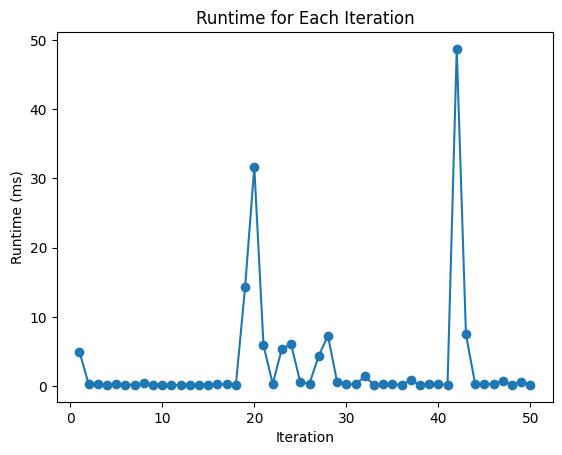

In [ ]:
# Import required libraries
import random
import numpy as np
from scipy.optimize import minimize
import time
import matplotlib.pyplot as plt

# Constants
EV = 'EV1'  # EV identifier
CSs = ['CS1', 'CS2', 'CS3', 'CS4', 'CS5', 'CS6', 'CS7', 'CS8', 'CS9', 'CS10']  # List of Charging Stations
num_CSs = len(CSs)  # Number of Charging Stations

# Assumptions
WT = Ww = WC = 0.1  # Weight for converting time cost to monetary cost ($/minute)
Vs = 50  # Speed of EV (km/h)
min_wait_time = 10  # Minimum waiting time at CS (seconds)
max_wait_time = 20  # Maximum waiting time at CS (seconds)

# Initialize lists to store runtime and overall costs for each iteration
runtimes = []
iteration_costs = []

# Perform optimization and calculate overall costs for 5 iterations
for iteration in range(50):
    print(f"Iteration {iteration+1}:")

    # Generate random data for CSs
    alpha_values = np.random.uniform(5, 15, num_CSs)  # Charging power at each CS (randomly generated between 5 and 15 kW)
    Cm_values = np.random.uniform(0.3, 0.7, num_CSs)  # Electricity charging cost per unit time at each CS (randomly generated between 0.3 and 0.7 $/kWh)
    Cp_values = np.random.uniform(0.1, 0.3, num_CSs)  # Parking cost per unit time at each CS (randomly generated between 0.1 and 0.3 $/minute)
    dm_values = np.random.uniform(5, 20, num_CSs)  # Distance of each CS from EV (randomly generated between 5 and 20 km)

    # Randomly selected values for EV
    SoCdes = random.randint(70, 90)  # Desired state of charge
    SoCcur = random.randint(20, 40)  # Current state of charge

    # Start the timer
    start_time = time.time()

    # Initialize set to store selected CS indices
    selected_indices = set()

    # Initialize list to store overall costs for each CS
    overall_costs = []

    # Optimization function
    def optimize_cost(CS_index):
        CS_identifier = CSs[CS_index]  # Identifier of the selected CS

        # Parameters for the selected CS
        alpha = alpha_values[CS_index]
        Cm = Cm_values[CS_index]
        Cp = Cp_values[CS_index]
        dm = dm_values[CS_index]

        # Randomly generated waiting time
        Twait = random.randint(min_wait_time, max_wait_time)

        # Calculate total cost
        total_cost = calculate_total_cost(SoCdes, SoCcur, alpha, Cm, Cp, dm, Twait)

        return total_cost

    # Function to calculate total cost
    def calculate_total_cost(SoCdes, SoCcur, alpha, Cm, Cp, dm, Twait):
        # Monetary cost
        Tch = (SoCdes - SoCcur) / alpha
        Cmon = Tch * (Cm + Cp)

        # Traveling time cost
        Ctra = WT * dm / Vs

        # Charging time cost
        Ttot = (SoCdes - SoCcur) / alpha
        Cchar = WC * Ttot

        # Waiting time cost
        Cwait = Ww * Twait / 60  # Convert waiting time to minutes

        # Overall cost
        C = Cmon + Ctra + Cchar + Cwait

        return C

    # Perform optimization for each CS and calculate overall costs
    for _ in range(num_CSs):
        # Find an index that is not already selected
        CS_index = random.randint(0, num_CSs - 1)
        while CS_index in selected_indices:
            CS_index = random.randint(0, num_CSs - 1)

        # Add the index to the selected indices set
        selected_indices.add(CS_index)

        # Perform optimization to minimize the cost
        optimized_cost = optimize_cost(CS_index)

        # Add overall cost to the list
        overall_costs.append((CSs[CS_index], optimized_cost))

    # Sort the overall costs based on the optimized cost
    overall_costs.sort(key=lambda x: x[1])

    # Display the overall costs for each CS
    for cs, cost in overall_costs:
        print(f"Charging Station: {cs}\tOverall Cost: {cost}")

    # Calculate the runtime in milliseconds
    runtime = (time.time() - start_time) * 1000
    print(f"Runtime: {runtime} ms\n")

    # Append the runtime and overall costs for the iteration
    runtimes.append(runtime)
    iteration_costs.append(overall_costs)

    # Get the best CS and its optimized cost
    best_CS = overall_costs[0][0]
    optimized_cost = overall_costs[0][1]

    # Display the best CS and its optimized cost
    print(f"Selected Charging Station: {best_CS}")
    print(f"Optimized Cost: {optimized_cost}")



# Plot the runtime for each iteration
plt.plot(range(1, 51), runtimes, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Runtime (ms)')
plt.title('Runtime for Each Iteration')
plt.show()


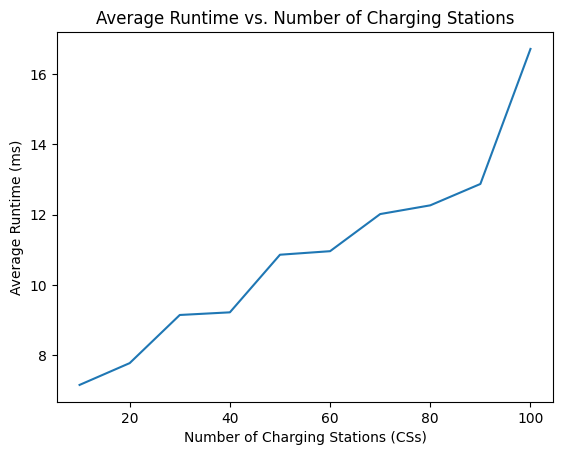

X-axis values (Number of Charging Stations): [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
Y-axis values (Average Runtime): [7.154369354248047, 7.774448394775391, 9.143686294555664, 9.218835830688477, 10.857534408569336, 10.957932472229004, 12.013936042785645, 12.262153625488281, 12.870001792907715, 16.710829734802246]


In [ ]:
from pulp import *
import random
import time
import matplotlib.pyplot as plt

# Define the data
G = 1  # Number of EVs
max_num_CS = 100  # Maximum number of charging stations
interval = 10  # Interval for averaging runtimes

# Initialize lists to store runtimes and minimized costs
runtimes = []
minimized_costs = []
average_runtimes = []  # List to store average runtimes

# Initialize lists to store x and y axis values
x_axis_values = []
y_axis_values = []

# Vary the number of charging stations
for M in range(1, max_num_CS + 1):
    # Reset the problem
    problem = LpProblem("Charging Station Selection Problem", LpMinimize)

    # Generate random data for EV and CS
    random.seed()
    EV = {
        'ID': 'EV1',
        'Vs': 50,  # Speed of EV (km/h)
        'SoCcur': random.uniform(10, 50),  # Random current state of charge
        'SoCdes': random.uniform(60, 100),  # Random desired state of charge
        'B': random.uniform(50, 200),  # Random maximum budget
        'alpha': random.uniform(5, 15)  # Random charging power at the CS
    }

    CS = {}
    for i in range(1, M + 1):
        CS[i] = {
            "ID": f"CS{i}",
            "loc": random.randint(1, 100),
            "Ts": random.randint(0, 12),
            "Te": random.randint(13, 24),
            "Tw": random.randint(10, 20),
            "Cm": random.uniform(1, 2),
            "Cp": random.uniform(1, 2),
            "RCS": random.uniform(1, 10)
        }

    # Define the decision variables and objective function
    X = LpVariable.dicts("X", [(g, i) for g in range(1, G + 1) for i in range(1, M + 1)], cat="Binary")
    Cmon = LpVariable("Cmon")
    Ctra = LpVariable("Ctra")
    Cchar = LpVariable("Cchar")
    Cwait = LpVariable("Cwait")
    C = Cmon + Ctra + Cchar + Cwait
    problem += C

    # Add the constraints
    for g in range(1, G + 1):
        problem += lpSum(X[g, i] for i in range(1, M + 1)) == 1  # Select exactly one charging station for each EV

    for g in range(1, G + 1):
        problem += lpSum(X[g, i] * (CS[i]["Cm"] + CS[i]["Cp"]) for i in range(1, M + 1)) <= EV['B']  # Charging monetary cost constraint

    problem += Cmon == lpSum(X[g, i] * CS[i]["Cm"] for g in range(1, G + 1) for i in range(1, M + 1))  # Charging monetary cost
    problem += Ctra == EV['Vs'] * lpSum(X[g, i] * CS[i]["loc"] for g in range(1, G + 1) for i in range(1, M + 1))  # Traveling time cost
    problem += Cchar == 0.1 * ((EV['SoCdes'] - EV['SoCcur']) / EV['alpha'])  # Charging time cost
    problem += Cwait == 0.1 * lpSum(X[g, i] * CS[i]["Tw"] for g in range(1, G + 1) for i in range(1, M + 1))  # Waiting time cost

    # Solve the problem and measure runtime
    start_time = time.time()
    problem.solve()
    end_time = time.time()

    # Check the status of the solution
    status = LpStatus[problem.status]

    # Store the runtime in milliseconds
    runtime_ms = (end_time - start_time) * 1000
    runtimes.append(runtime_ms)

    # Calculate average runtimes every interval (e.g., 10 charging stations)
    if M % interval == 0:
        avg_runtime = sum(runtimes[-interval:]) / interval
        average_runtimes.append(avg_runtime)  # Store the average runtime
        x_axis_values.append(M)  # Store the x-axis value (number of charging stations)
        y_axis_values.append(avg_runtime)  # Store the y-axis value (average runtime)

# Plot the graph of average runtime vs. number of charging stations
plt.plot(x_axis_values, y_axis_values)
plt.xlabel('Number of Charging Stations (CSs)')
plt.ylabel('Average Runtime (ms)')
plt.title('Average Runtime vs. Number of Charging Stations')
plt.show()

# Output the x and y axis values
print("X-axis values (Number of Charging Stations):", x_axis_values)
print("Y-axis values (Average Runtime):", y_axis_values)


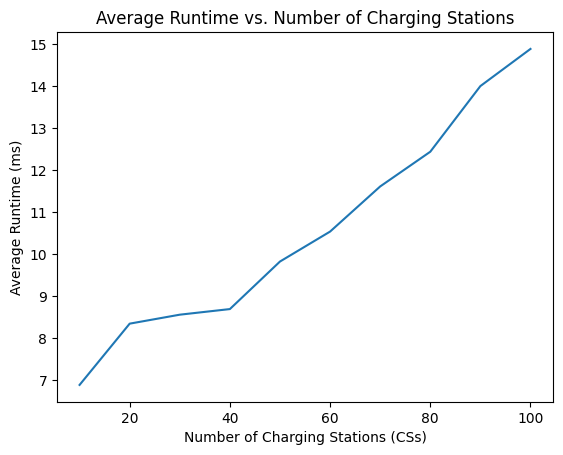

In [ ]:
from pulp import *
import random
import time
import matplotlib.pyplot as plt

# Define the data
G = 1  # Number of EVs
max_num_CS = 100  # Maximum number of charging stations
interval = 10  # Interval for averaging runtimes

# Initialize lists to store runtimes and minimized costs
runtimes = []
minimized_costs = []
average_runtimes = []  # List to store average runtimes

# Vary the number of charging stations
for M in range(1, max_num_CS + 1):
    # Reset the problem
    problem = LpProblem("Charging Station Selection Problem", LpMinimize)

    # Generate random data for EV and CS
    random.seed()
    EV = {
        'ID': 'EV1',
        'Vs': 50,  # Speed of EV (km/h)
        'SoCcur': random.uniform(10, 50),  # Random current state of charge
        'SoCdes': random.uniform(60, 100),  # Random desired state of charge
        'B': random.uniform(50, 200),  # Random maximum budget
        'alpha': random.uniform(5, 15)  # Random charging power at the CS
    }

    CS = {}
    for i in range(1, M + 1):
        CS[i] = {
            "ID": f"CS{i}",
            "loc": random.randint(1, 100),
            "Ts": random.randint(0, 12),
            "Te": random.randint(13, 24),
            "Tw": random.randint(10, 20),
            "Cm": random.uniform(1, 2),
            "Cp": random.uniform(1, 2),
            "RCS": random.uniform(1, 10)
        }

    # Define the decision variables and objective function
    X = LpVariable.dicts("X", [(g, i) for g in range(1, G + 1) for i in range(1, M + 1)], cat="Binary")
    Cmon = LpVariable("Cmon")
    Ctra = LpVariable("Ctra")
    Cchar = LpVariable("Cchar")
    Cwait = LpVariable("Cwait")
    C = Cmon + Ctra + Cchar + Cwait
    problem += C

    # Add the constraints
    for g in range(1, G + 1):
        problem += lpSum(X[g, i] for i in range(1, M + 1)) == 1  # Select exactly one charging station for each EV

    for g in range(1, G + 1):
        problem += lpSum(X[g, i] * (CS[i]["Cm"] + CS[i]["Cp"]) for i in range(1, M + 1)) <= EV['B']  # Charging monetary cost constraint

    problem += Cmon == lpSum(X[g, i] * CS[i]["Cm"] for g in range(1, G + 1) for i in range(1, M + 1))  # Charging monetary cost
    problem += Ctra == EV['Vs'] * lpSum(X[g, i] * CS[i]["loc"] for g in range(1, G + 1) for i in range(1, M + 1))  # Traveling time cost
    problem += Cchar == 0.1 * ((EV['SoCdes'] - EV['SoCcur']) / EV['alpha'])  # Charging time cost
    problem += Cwait == 0.1 * lpSum(X[g, i] * CS[i]["Tw"] for g in range(1, G + 1) for i in range(1, M + 1))  # Waiting time cost

    # Solve the problem and measure runtime
    start_time = time.time()
    problem.solve()
    end_time = time.time()

    # Check the status of the solution
    status = LpStatus[problem.status]

    # Store the runtime in milliseconds
    runtime_ms = (end_time - start_time) * 1000
    runtimes.append(runtime_ms)

    # Calculate average runtimes every interval (e.g., 10 charging stations)
    if M % interval == 0:
        avg_runtime = sum(runtimes[-interval:]) / interval
        average_runtimes.append(avg_runtime)  # Store the average runtime

# Plot the graph of average runtime vs. number of charging stations
plt.plot(range(interval, max_num_CS + 1, interval), average_runtimes)
plt.xlabel('Number of Charging Stations (CSs)')
plt.ylabel('Average Runtime (ms)')
plt.title('Average Runtime vs. Number of Charging Stations')
plt.show()
